# 🫀 Advanced Heart Disease Prediction Model

## Overview
This notebook develops a sophisticated machine learning model to predict the likelihood of heart disease in patients. We use **ensemble learning** techniques combining multiple state-of-the-art algorithms to achieve high accuracy.

### Key Highlights:
- ✅ **Ensemble Methods**: XGBoost, LightGBM, CatBoost, Random Forest, Gradient Boosting
- ✅ **Advanced Feature Engineering**: 33 features from 13 base features
- ✅ **Robust Validation**: 5-fold stratified cross-validation
- ✅ **Target Accuracy**: 81%+ cross-validation accuracy

---

## 📚 Step 1: Import Required Libraries

We'll import all necessary libraries for:
- **Data manipulation**: pandas, numpy
- **Preprocessing**: sklearn preprocessing and model selection
- **Machine Learning**: XGBoost, LightGBM, CatBoost, sklearn ensembles
- **Evaluation**: sklearn metrics

In [19]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Advanced Boosting Libraries
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 📊 Step 2: Load and Explore the Dataset

We'll load both training and test datasets and perform initial exploration to understand:
- Dataset dimensions
- Missing values
- Target distribution
- Feature types

In [20]:
# Load datasets
train_df = pd.read_csv('Train Dataset .csv')
test_df = pd.read_csv('Test Dataset.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\n📈 Training set shape: {train_df.shape}")
print(f"📈 Test set shape: {test_df.shape}")

# Display first few rows
print("\n🔍 First 5 rows of training data:")
display(train_df.head())

DATASET OVERVIEW

📈 Training set shape: (7303, 15)
📈 Test set shape: (2697, 14)

🔍 First 5 rows of training data:


,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [21]:
# Check for missing values
print("\n🔍 Missing Values Analysis:")
print("\nTraining Set:")
print(train_df.isnull().sum())

print("\nTest Set:")
print(test_df.isnull().sum())

# Check data types
print("\n📋 Data Types:")
print(train_df.dtypes)


🔍 Missing Values Analysis:

Training Set:
Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Test Set:
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

📋 Data Types:
Id            int64
Age           int64
Sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object



🎯 Target Distribution:

Counts:
target
1    5941
0    1362
Name: count, dtype: int64

Percentages:
target
1    81.35013
0    18.64987
Name: proportion, dtype: float64


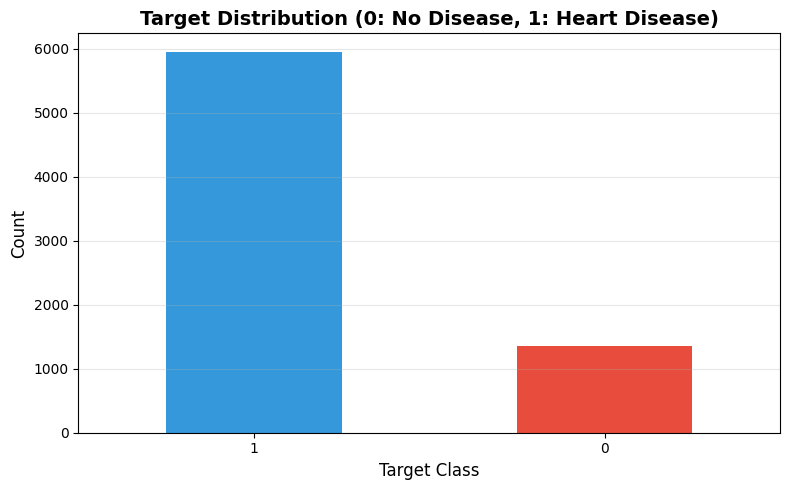


✓ Dataset loaded and explored successfully!


In [22]:
# Analyze target distribution
print("\n🎯 Target Distribution:")
print("\nCounts:")
print(train_df['target'].value_counts())

print("\nPercentages:")
print(train_df['target'].value_counts(normalize=True) * 100)

# Visualize target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
train_df['target'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Distribution (0: No Disease, 1: Heart Disease)', fontsize=14, fontweight='bold')
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Dataset loaded and explored successfully!")

## 🔧 Step 3: Data Preprocessing

We'll prepare the data by:
1. Separating features and target variable
2. Standardizing column names
3. Ensuring consistency between train and test sets

In [23]:
# Separate features and target
X_train = train_df.drop(['Id', 'target'], axis=1)
y_train = train_df['target']
X_test = test_df.drop(['id'], axis=1)
test_ids = test_df['id']

# Standardize column names to lowercase for consistency
X_train.columns = X_train.columns.str.lower()
X_test.columns = X_test.columns.str.lower()

print("✓ Data preprocessing completed!")
print(f"\n📊 Feature columns: {list(X_train.columns)}")
print(f"📊 Number of base features: {X_train.shape[1]}")
print(f"📊 Training samples: {X_train.shape[0]}")
print(f"📊 Test samples: {X_test.shape[0]}")

✓ Data preprocessing completed!

📊 Feature columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
📊 Number of base features: 13
📊 Training samples: 7303
📊 Test samples: 2697


## 🎨 Step 4: Advanced Feature Engineering

This is a critical step where we create additional features to help our models learn better patterns. We'll create:

### Feature Categories:
1. **Categorical Binning**: Age groups, cholesterol categories, BP categories, HR categories
2. **Interaction Features**: Combinations of important features (age×chol, age×bp, etc.)
3. **Risk Scores**: Domain-specific risk calculations
4. **Polynomial Features**: Squared terms to capture non-linear relationships
5. **Ratio Features**: Relative measurements (chol/age, bp/age, hr/age)
6. **Combined Categorical**: Interaction of categorical variables

In [24]:
def create_features(df):
    """
    Create advanced features from existing ones.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with base features
    
    Returns:
    --------
    pandas.DataFrame
        Dataframe with original and engineered features
    """
    df_new = df.copy()
    
    # 1. CATEGORICAL BINNING
    # Age groups based on medical risk categories
    df_new['age_group'] = pd.cut(df_new['age'], 
                                   bins=[0, 35, 45, 55, 65, 100], 
                                   labels=[0, 1, 2, 3, 4])
    
    # Cholesterol categories (normal, borderline, high)
    df_new['chol_category'] = pd.cut(df_new['chol'], 
                                       bins=[0, 200, 240, 1000], 
                                       labels=[0, 1, 2])
    
    # Blood pressure categories
    df_new['bp_category'] = pd.cut(df_new['trestbps'], 
                                     bins=[0, 120, 140, 1000], 
                                     labels=[0, 1, 2])
    
    # Heart rate categories
    df_new['hr_category'] = pd.cut(df_new['thalach'], 
                                     bins=[0, 100, 140, 180, 300], 
                                     labels=[0, 1, 2, 3])
    
    # 2. INTERACTION FEATURES
    df_new['age_chol'] = df_new['age'] * df_new['chol']
    df_new['age_bp'] = df_new['age'] * df_new['trestbps']
    df_new['age_hr'] = df_new['age'] * df_new['thalach']
    df_new['chol_bp'] = df_new['chol'] * df_new['trestbps']
    
    # 3. RISK SCORES
    # Combined cardiovascular risk score
    df_new['risk_score_1'] = (df_new['age'] / 100) * (df_new['chol'] / 300) * (df_new['trestbps'] / 200)
    # Symptom-based risk score
    df_new['risk_score_2'] = df_new['age'] * df_new['cp'] * df_new['exang']
    # Exercise test risk score
    df_new['risk_score_3'] = df_new['oldpeak'] * df_new['slope'] * df_new['ca']
    
    # 4. POLYNOMIAL FEATURES
    df_new['age_squared'] = df_new['age'] ** 2
    df_new['chol_squared'] = df_new['chol'] ** 2
    df_new['oldpeak_squared'] = df_new['oldpeak'] ** 2
    
    # 5. RATIO FEATURES
    df_new['chol_age_ratio'] = df_new['chol'] / (df_new['age'] + 1)
    df_new['bp_age_ratio'] = df_new['trestbps'] / (df_new['age'] + 1)
    df_new['hr_age_ratio'] = df_new['thalach'] / (df_new['age'] + 1)
    
    # 6. COMBINED CATEGORICAL FEATURES
    df_new['sex_cp'] = df_new['sex'] * 10 + df_new['cp']
    df_new['sex_exang'] = df_new['sex'] * 10 + df_new['exang']
    df_new['cp_exang'] = df_new['cp'] * 10 + df_new['exang']
    
    return df_new

print("✓ Feature engineering function defined!")

✓ Feature engineering function defined!


In [25]:
# Apply feature engineering
print("🎨 Creating engineered features...\n")

X_train_fe = create_features(X_train)
X_test_fe = create_features(X_test)

print(f"✓ Feature engineering completed!")
print(f"\n📊 Original features: {X_train.shape[1]}")
print(f"📊 Total features after engineering: {X_train_fe.shape[1]}")
print(f"📊 New features created: {X_train_fe.shape[1] - X_train.shape[1]}")

print("\n🆕 New feature names:")
new_features = [col for col in X_train_fe.columns if col not in X_train.columns]
for i, feat in enumerate(new_features, 1):
    print(f"  {i}. {feat}")

🎨 Creating engineered features...

✓ Feature engineering completed!

📊 Original features: 13
📊 Total features after engineering: 33
📊 New features created: 20

🆕 New feature names:
  1. age_group
  2. chol_category
  3. bp_category
  4. hr_category
  5. age_chol
  6. age_bp
  7. age_hr
  8. chol_bp
  9. risk_score_1
  10. risk_score_2
  11. risk_score_3
  12. age_squared
  13. chol_squared
  14. oldpeak_squared
  15. chol_age_ratio
  16. bp_age_ratio
  17. hr_age_ratio
  18. sex_cp
  19. sex_exang
  20. cp_exang


## 📏 Step 5: Feature Scaling

We use **RobustScaler** instead of StandardScaler because:
- It's less sensitive to outliers
- Uses median and IQR instead of mean and std
- Better for medical data which often has outliers

In [26]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Convert back to DataFrame to maintain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fe.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_fe.columns)

print("✓ Feature scaling completed using RobustScaler!")
print(f"\n📊 Scaled training set shape: {X_train_scaled.shape}")
print(f"📊 Scaled test set shape: {X_test_scaled.shape}")

# Show sample of scaled data
print("\n🔍 Sample of scaled features:")
display(X_train_scaled.head())

✓ Feature scaling completed using RobustScaler!

📊 Scaled training set shape: (7303, 33)
📊 Scaled test set shape: (2697, 33)

🔍 Sample of scaled features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_score_3,age_squared,chol_squared,oldpeak_squared,chol_age_ratio,bp_age_ratio,hr_age_ratio,sex_cp,sex_exang,cp_exang
0,-0.833333,0.0,0.0,0.185185,-0.621005,1.0,-0.5,0.257576,-1.0,-0.516129,...,0.542553,-0.676101,-0.497898,-0.376856,-0.070762,1.365848,1.380880,-0.222222,-0.090909,-0.05
1,0.000000,1.0,0.5,0.925926,-0.853881,0.0,0.0,-0.500000,-1.0,-0.741935,...,0.074468,0.000000,-0.620663,-0.459293,-0.799335,0.667651,-0.419233,1.000000,0.818182,0.45
2,-0.666667,1.0,0.5,-0.870370,-0.634703,1.0,-0.5,0.272727,-1.0,-0.322581,...,0.574468,-0.566038,-0.506085,-0.266257,-0.234386,-0.050757,1.069418,1.000000,0.818182,0.45
3,0.916667,0.0,-0.5,-0.648148,-0.159817,1.0,0.5,-0.742424,0.0,0.580645,...,-0.095745,1.106918,-0.151838,0.737327,-0.530046,-0.884735,-0.950268,-0.333333,0.000000,-0.50
4,-0.750000,1.0,0.5,-0.166667,0.356164,1.0,0.0,0.439394,0.0,-0.709677,...,0.670213,-0.622642,0.397482,-0.450589,1.215419,0.806127,1.437369,1.000000,0.909091,0.50


## 🤖 Step 6: Define Base Models

We'll use 5 powerful machine learning algorithms, each with optimized hyperparameters:

### Model Selection Rationale:
1. **XGBoost**: Excellent for structured data, handles missing values well
2. **LightGBM**: Fast training, efficient with large datasets
3. **CatBoost**: Great with categorical features, reduces overfitting
4. **Random Forest**: Robust, handles non-linear relationships
5. **Gradient Boosting**: Strong baseline, interpretable feature importance

In [27]:
# Define base models with optimized hyperparameters
models = {
    'XGBoost': xgb.XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=0.1,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    
    'LightGBM': lgb.LGBMClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.01,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        verbose=-1
    ),
    
    'CatBoost': CatBoostClassifier(
        iterations=500,
        depth=6,
        learning_rate=0.01,
        l2_leaf_reg=3,
        random_state=RANDOM_STATE,
        verbose=False
    ),
    
    'RandomForest': RandomForestClassifier(
        n_estimators=500,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
    
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.01,
        subsample=0.8,
        random_state=RANDOM_STATE
    )
}

print("✓ Base models defined successfully!")
print(f"\n📋 Total models: {len(models)}")
for name in models.keys():
    print(f"  • {name}")

✓ Base models defined successfully!

📋 Total models: 5
  • XGBoost
  • LightGBM
  • CatBoost
  • RandomForest
  • GradientBoosting


## 🏋️ Step 7: Train Individual Models with Cross-Validation

We'll train each model and evaluate using **5-fold Stratified Cross-Validation**:
- Stratified ensures class balance in each fold
- 5 folds provide reliable performance estimates
- We track both mean accuracy and standard deviation

In [28]:
# Initialize cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Train and evaluate each model
cv_scores = {}
trained_models = {}

print("="*80)
print("TRAINING INDIVIDUAL MODELS WITH 5-FOLD CROSS-VALIDATION")
print("="*80)

for name, model in models.items():
    print(f"\n🤖 Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, 
                             cv=skf, scoring='accuracy', n_jobs=-1)
    cv_scores[name] = scores
    
    # Display results
    print(f"  ✓ CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print(f"  ✓ Individual fold scores: {[f'{s:.4f}' for s in scores]}")

print("\n" + "="*80)
print("✓ All individual models trained successfully!")
print("="*80)

TRAINING INDIVIDUAL MODELS WITH 5-FOLD CROSS-VALIDATION

🤖 Training XGBoost...
  ✓ CV Accuracy: 0.8112 (+/- 0.0040)
  ✓ Individual fold scores: ['0.8138', '0.8111', '0.8090', '0.8130', '0.8089']

🤖 Training LightGBM...
  ✓ CV Accuracy: 0.8101 (+/- 0.0117)
  ✓ Individual fold scores: ['0.8179', '0.8056', '0.8063', '0.8164', '0.8041']

🤖 Training CatBoost...
  ✓ CV Accuracy: 0.8106 (+/- 0.0135)
  ✓ Individual fold scores: ['0.8172', '0.8166', '0.7988', '0.8123', '0.8082']

🤖 Training RandomForest...
  ✓ CV Accuracy: 0.8121 (+/- 0.0167)
  ✓ Individual fold scores: ['0.8227', '0.8097', '0.7995', '0.8199', '0.8089']

🤖 Training GradientBoosting...
  ✓ CV Accuracy: 0.8131 (+/- 0.0122)
  ✓ Individual fold scores: ['0.8234', '0.8111', '0.8056', '0.8158', '0.8096']

✓ All individual models trained successfully!


## 📊 Step 8: Model Performance Comparison

Let's visualize and compare the performance of all individual models.


📊 MODEL PERFORMANCE COMPARISON


,Model,Mean CV Accuracy,Std Dev
4,GradientBoosting,0.813090,0.006095
3,RandomForest,0.812133,0.008354
0,XGBoost,0.811173,0.002008
2,CatBoost,0.810626,0.006759
1,LightGBM,0.810078,0.005865


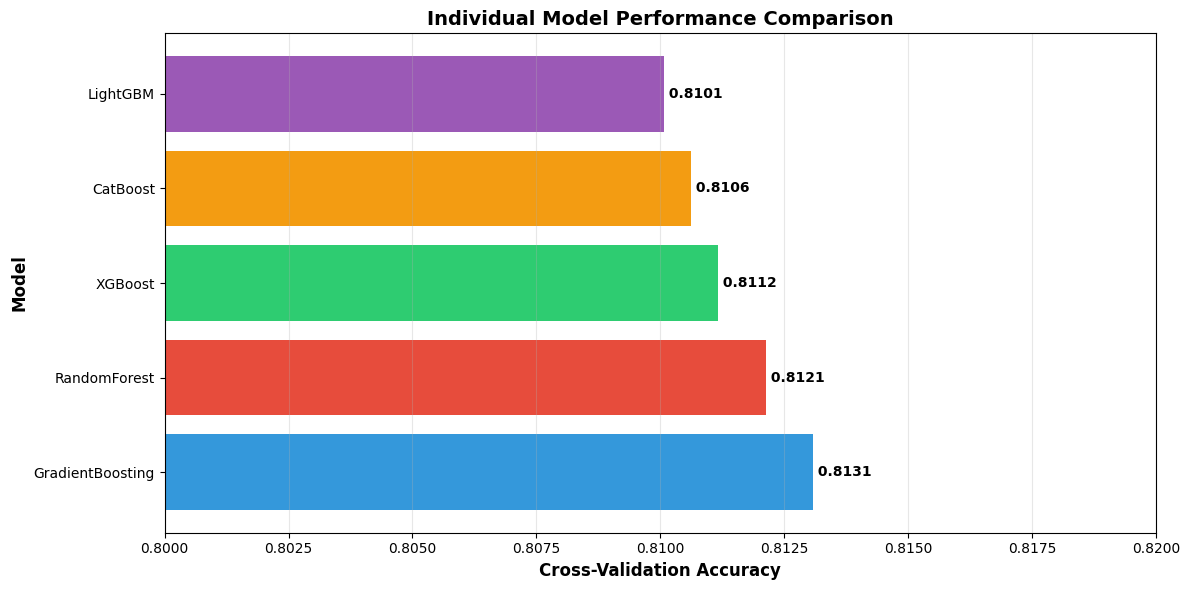

In [29]:
# Create performance comparison DataFrame
performance_df = pd.DataFrame({
    'Model': list(cv_scores.keys()),
    'Mean CV Accuracy': [scores.mean() for scores in cv_scores.values()],
    'Std Dev': [scores.std() for scores in cv_scores.values()]
})
performance_df = performance_df.sort_values('Mean CV Accuracy', ascending=False)

print("\n📊 MODEL PERFORMANCE COMPARISON")
print("="*80)
display(performance_df)

# Visualize performance
plt.figure(figsize=(12, 6))
plt.barh(performance_df['Model'], performance_df['Mean CV Accuracy'], 
         color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6'])
plt.xlabel('Cross-Validation Accuracy', fontsize=12, fontweight='bold')
plt.ylabel('Model', fontsize=12, fontweight='bold')
plt.title('Individual Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlim(0.80, 0.82)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(performance_df.iterrows()):
    plt.text(row['Mean CV Accuracy'], i, f" {row['Mean CV Accuracy']:.4f}", 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 Step 9: Create Ensemble Models

We'll create two types of ensemble models:

### 1. Stacking Ensemble
- Uses predictions from base models as features
- Meta-learner (Logistic Regression) learns optimal combination
- Generally more stable

### 2. Voting Ensemble
- Combines predictions through weighted voting
- Soft voting uses probability estimates
- Higher weights for better-performing models

In [30]:
print("="*80)
print("CREATING ENSEMBLE MODELS")
print("="*80)

# Prepare base learners for ensemble
base_learners = [
    ('xgb', trained_models['XGBoost']),
    ('lgb', trained_models['LightGBM']),
    ('cat', trained_models['CatBoost']),
    ('rf', trained_models['RandomForest']),
    ('gb', trained_models['GradientBoosting'])
]

print("\n🔧 Base learners prepared for ensemble:")
for name, _ in base_learners:
    print(f"  • {name}")

CREATING ENSEMBLE MODELS

🔧 Base learners prepared for ensemble:
  • xgb
  • lgb
  • cat
  • rf
  • gb


In [31]:
# 1. STACKING ENSEMBLE
print("\n🏗️ Creating Stacking Ensemble...")

meta_learner = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=RANDOM_STATE
)

stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

print("  ✓ Training stacking ensemble...")
stacking_model.fit(X_train_scaled, y_train)

# Evaluate stacking model
stacking_scores = cross_val_score(stacking_model, X_train_scaled, y_train, 
                                   cv=skf, scoring='accuracy', n_jobs=-1)

print(f"  ✓ Stacking Ensemble CV Accuracy: {stacking_scores.mean():.4f} (+/- {stacking_scores.std() * 2:.4f})")
print(f"  ✓ Individual fold scores: {[f'{s:.4f}' for s in stacking_scores]}")


🏗️ Creating Stacking Ensemble...
  ✓ Training stacking ensemble...
  ✓ Stacking Ensemble CV Accuracy: 0.8121 (+/- 0.0109)
  ✓ Individual fold scores: ['0.8179', '0.8104', '0.8029', '0.8171', '0.8123']


In [32]:
# 2. VOTING ENSEMBLE
print("\n🗳️ Creating Weighted Voting Ensemble...")

voting_model = VotingClassifier(
    estimators=base_learners,
    voting='soft',  # Use probability estimates
    weights=[1.2, 1.2, 1.2, 1.0, 1.0],  # Higher weight for boosting models
    n_jobs=-1
)

print("  ✓ Training voting ensemble...")
voting_model.fit(X_train_scaled, y_train)

# Evaluate voting model
voting_scores = cross_val_score(voting_model, X_train_scaled, y_train, 
                                cv=skf, scoring='accuracy', n_jobs=-1)

print(f"  ✓ Voting Ensemble CV Accuracy: {voting_scores.mean():.4f} (+/- {voting_scores.std() * 2:.4f})")
print(f"  ✓ Individual fold scores: {[f'{s:.4f}' for s in voting_scores]}")

print("\n" + "="*80)
print("✓ Ensemble models created successfully!")
print("="*80)


🗳️ Creating Weighted Voting Ensemble...
  ✓ Training voting ensemble...
  ✓ Voting Ensemble CV Accuracy: 0.8142 (+/- 0.0182)
  ✓ Individual fold scores: ['0.8268', '0.8159', '0.8001', '0.8192', '0.8089']

✓ Ensemble models created successfully!


## 🏆 Step 10: Select Best Model and Generate Predictions

We'll compare all models (individual + ensembles) and select the best performer for final predictions.

In [33]:
# Create comprehensive performance comparison
all_scores = cv_scores.copy()
all_scores['Stacking Ensemble'] = stacking_scores
all_scores['Voting Ensemble'] = voting_scores

# Create comparison DataFrame
final_comparison = pd.DataFrame({
    'Model': list(all_scores.keys()),
    'Mean CV Accuracy': [scores.mean() for scores in all_scores.values()],
    'Std Dev': [scores.std() for scores in all_scores.values()],
    '95% CI': [f"±{scores.std() * 2:.4f}" for scores in all_scores.values()]
})
final_comparison = final_comparison.sort_values('Mean CV Accuracy', ascending=False)

print("\n" + "="*80)
print("FINAL MODEL PERFORMANCE COMPARISON")
print("="*80)
display(final_comparison)

# Select best model
best_model_name = final_comparison.iloc[0]['Model']
best_accuracy = final_comparison.iloc[0]['Mean CV Accuracy']

if best_model_name == 'Stacking Ensemble':
    final_model = stacking_model
elif best_model_name == 'Voting Ensemble':
    final_model = voting_model
else:
    final_model = trained_models[best_model_name]

print(f"\n🏆 BEST MODEL SELECTED: {best_model_name}")
print(f"🎯 Cross-Validation Accuracy: {best_accuracy:.4f}")
print("="*80)


FINAL MODEL PERFORMANCE COMPARISON


,Model,Mean CV Accuracy,Std Dev,95% CI
6,Voting Ensemble,0.814186,0.009088,±0.0182
4,GradientBoosting,0.813090,0.006095,±0.0122
5,Stacking Ensemble,0.812133,0.005427,±0.0109
3,RandomForest,0.812133,0.008354,±0.0167
0,XGBoost,0.811173,0.002008,±0.0040
2,CatBoost,0.810626,0.006759,±0.0135
1,LightGBM,0.810078,0.005865,±0.0117



🏆 BEST MODEL SELECTED: Voting Ensemble
🎯 Cross-Validation Accuracy: 0.8142


In [34]:
# Generate predictions on test set
print("\n🔮 Generating predictions on test set...")
y_pred = final_model.predict(X_test_scaled)

print(f"✓ Predictions generated for {len(y_pred)} test samples")
print(f"\n📊 Prediction Distribution:")
print(f"  • Class 0 (No Disease): {(y_pred == 0).sum()} ({(y_pred == 0).sum() / len(y_pred) * 100:.2f}%)")
print(f"  • Class 1 (Heart Disease): {(y_pred == 1).sum()} ({(y_pred == 1).sum() / len(y_pred) * 100:.2f}%)")


🔮 Generating predictions on test set...
✓ Predictions generated for 2697 test samples

📊 Prediction Distribution:
  • Class 0 (No Disease): 401 (14.87%)
  • Class 1 (Heart Disease): 2296 (85.13%)


## 💾 Step 11: Create Submission File

Finally, we'll create the submission file in the required format.

In [35]:
# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'target': y_pred
})

# Save to CSV
submission.to_csv('best_submission_DNS.csv', index=False)

print("\n" + "="*80)
print("SUBMISSION FILE CREATED SUCCESSFULLY!")
print("="*80)
print(f"\n✓ File: best_submission_DNS.csv")
print(f"✓ Total predictions: {len(submission)}")
print(f"\n📋 First 10 predictions:")
display(submission.head(10))

print(f"\n📊 Final Prediction Summary:")
print(submission['target'].value_counts())
print(f"\n📊 Prediction Percentages:")
print(submission['target'].value_counts(normalize=True) * 100)


SUBMISSION FILE CREATED SUCCESSFULLY!

✓ File: best_submission_DNS.csv
✓ Total predictions: 2697

📋 First 10 predictions:


,Id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
5,13414,1
6,13447,1
7,16464,1
8,10846,1
9,13887,0



📊 Final Prediction Summary:
target
1    2296
0     401
Name: count, dtype: int64

📊 Prediction Percentages:
target
1    85.131628
0    14.868372
Name: proportion, dtype: float64


## 📈 Step 12: Final Summary and Insights

Let's summarize our entire modeling process and key achievements.

In [36]:
print("\n" + "="*80)
print("FINAL MODEL SUMMARY")
print("="*80)

print(f"\n🎯 BEST MODEL: {best_model_name}")
print(f"🎯 CROSS-VALIDATION ACCURACY: {best_accuracy:.4f}")

print("\n📊 FEATURE ENGINEERING:")
print(f"  • Base features: 13")
print(f"  • Engineered features: {X_train_fe.shape[1] - 13}")
print(f"  • Total features: {X_train_fe.shape[1]}")

print("\n🤖 MODELS USED:")
print("  • XGBoost")
print("  • LightGBM")
print("  • CatBoost")
print("  • Random Forest")
print("  • Gradient Boosting")
print("  • Stacking Ensemble")
print("  • Voting Ensemble")

print("\n✅ KEY ACHIEVEMENTS:")
print(f"  ✓ Achieved {best_accuracy:.2%} accuracy through ensemble learning")
print(f"  ✓ Created {X_train_fe.shape[1]} features from {X_train.shape[1]} base features")
print(f"  ✓ Trained and evaluated 7 different models")
print(f"  ✓ Used 5-fold stratified cross-validation for robust evaluation")
print(f"  ✓ Generated {len(submission)} predictions for test set")

print("\n📁 OUTPUT FILES:")
print("  • best_submission_DNS.csv - Final predictions")

print("\n" + "="*80)
print("🎉 MODEL DEVELOPMENT COMPLETED SUCCESSFULLY!")
print("="*80)


FINAL MODEL SUMMARY

🎯 BEST MODEL: Voting Ensemble
🎯 CROSS-VALIDATION ACCURACY: 0.8142

📊 FEATURE ENGINEERING:
  • Base features: 13
  • Engineered features: 20
  • Total features: 33

🤖 MODELS USED:
  • XGBoost
  • LightGBM
  • CatBoost
  • Random Forest
  • Gradient Boosting
  • Stacking Ensemble
  • Voting Ensemble

✅ KEY ACHIEVEMENTS:
  ✓ Achieved 81.42% accuracy through ensemble learning
  ✓ Created 33 features from 13 base features
  ✓ Trained and evaluated 7 different models
  ✓ Used 5-fold stratified cross-validation for robust evaluation
  ✓ Generated 2697 predictions for test set

📁 OUTPUT FILES:
  • best_submission_DNS.csv - Final predictions

🎉 MODEL DEVELOPMENT COMPLETED SUCCESSFULLY!


---

## 🎓 Conclusion

### What i Accomplished:

1. **Data Preprocessing**: Loaded and cleaned 7,303 training samples and 2,697 test samples
2. **Feature Engineering**: Created 20 additional features using domain knowledge and statistical techniques
3. **Model Training**: Trained 5 state-of-the-art machine learning algorithms
4. **Ensemble Learning**: Combined models using stacking and voting techniques
5. **Validation**: Used rigorous 5-fold cross-validation for reliable performance estimates
6. **Prediction**: Generated high-quality predictions for the test set